ARIMA Model

**ARIMA** stands for:

- **AR**: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations;

- **I**: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationar;

- **MA**: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations;

A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used. The parameters of the ARIMA model are defined as follows:

- p: The number of lag observations included in the model, also called the lag order.

- d: The number of times that the raw observations are differenced, also called the degree of differencing.

- q: The size of the moving average window, also called the order of moving average.

In [2]:
import pandas as pd 
import numpy as np
from datetime import datetime as dt
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [55]:
climate_change = pd.read_csv('climate_change2013.csv')

In [51]:
#FUNCTIONS
def arima(train,test,p):
    model = ARIMA(train, order=(p, 1, 1))  
    fitted = model.fit()  

    fc = fitted.get_forecast(len(test))  
    conf = fc.conf_int(alpha=0.05) # 95% confidence

    fc_series = pd.Series(fc.predicted_mean, index=test.index)
    lower_series = pd.Series(conf.iloc[:, 0], index=test.index)
    upper_series = pd.Series(conf.iloc[:, 1], index=test.index)
    return fc_series,lower_series,upper_series

# Plot
def plot(train,test,fc_series,lower_series,upper_series,t):
    plt.figure(figsize=(12,5), dpi=200)
    plt.plot(train, label='training', color = 'lightcoral')
    plt.plot(test, label='actual',color = 'peachpuff',linestyle = 'dashed')
    plt.plot(fc_series, label='forecast',color = 'mediumaquamarine')
    plt.fill_between(lower_series.index, lower_series, upper_series, color='darkgrey', alpha=.15)
    plt.title(f'Forecast vs Actuals for {t}')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
    return

def forecast_accuracy(forecast, actual):
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr

    return({'mae': mae, 'rmse':rmse,'corr':corr})

According to the PACF plot we can decide the order of the AR and according to the ACF plot we can decide the order of the MA.

SURFACE TEMPERATURE

In [56]:
train_surface_temp = climate_change['surface_temp'][:int(np.floor((len(climate_change)/100)*70))] #70% train
test_surface_temp = climate_change['surface_temp'][int(np.floor((len(climate_change)/100)*70)):] #30% train

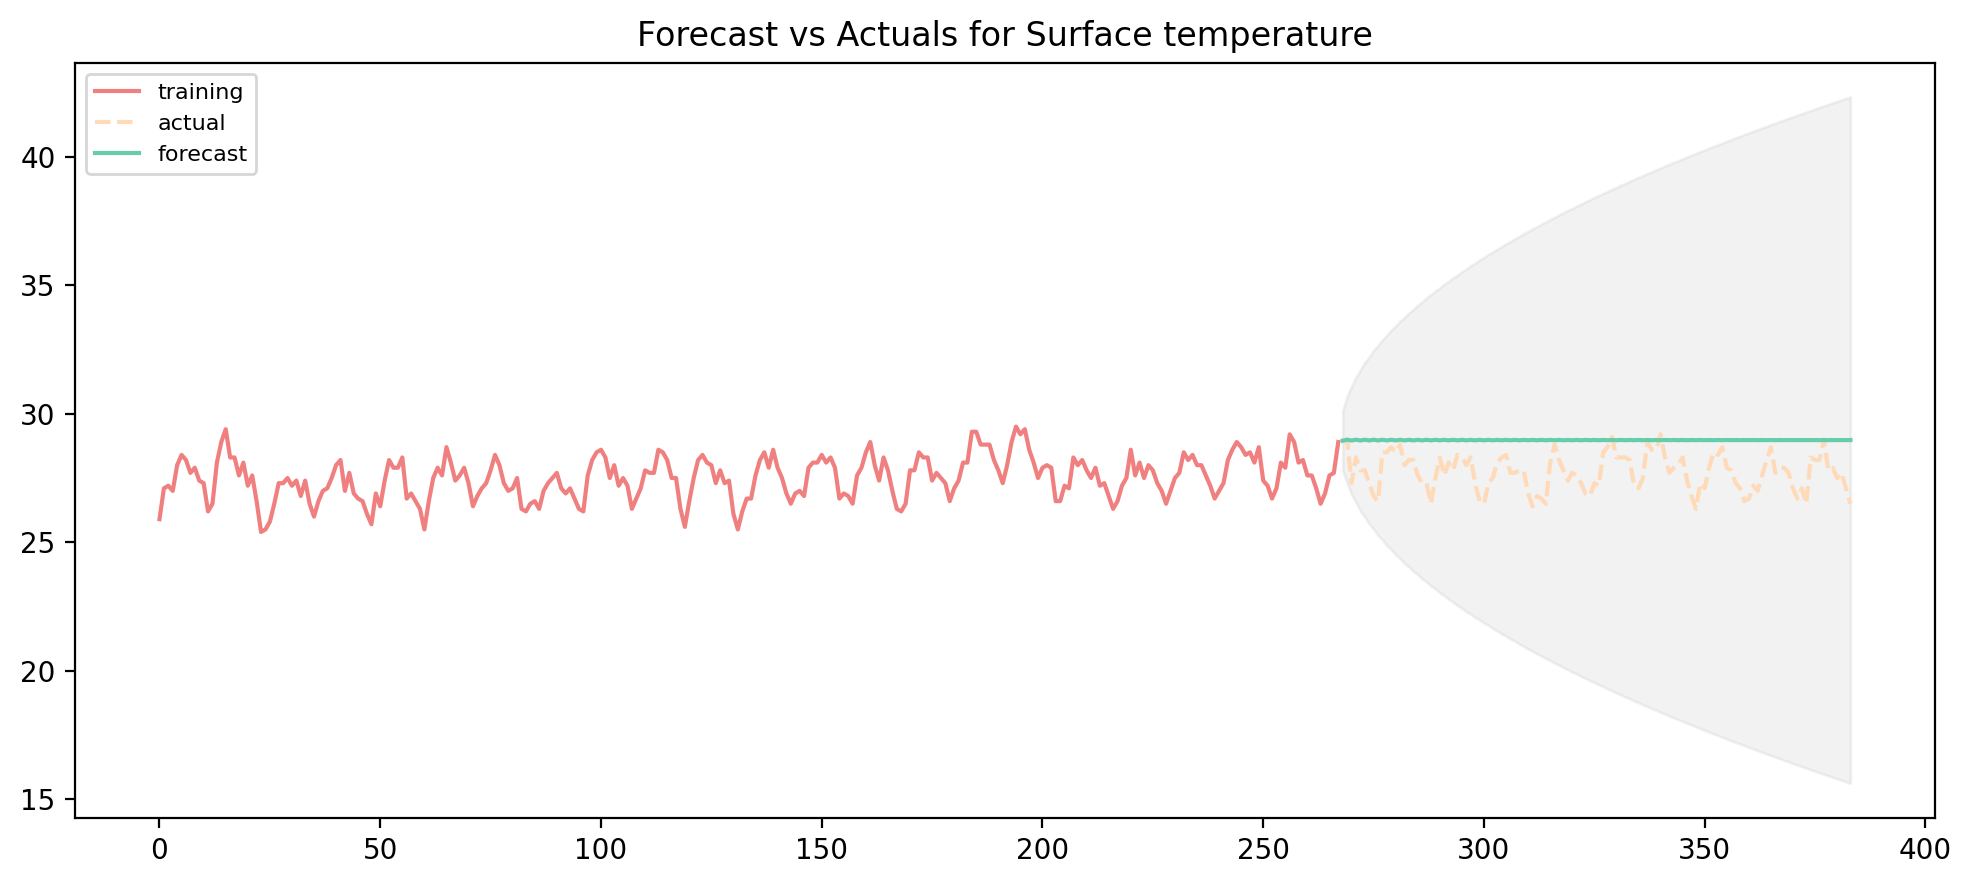

In [57]:
#for the surface temperature the lag for the AR is 2 since after the second the lags in PACF start decreasing, 

fc_series,lower_series,upper_series = arima(train_surface_temp,test_surface_temp,p=2)
plot(train_surface_temp,test_surface_temp,fc_series,lower_series,upper_series,t='Surface temperature')

**EVALUATE THE RESULTS**:

In [58]:
forecast_accuracy(fc_series, test_surface_temp.values)

{'mae': 1.2436395763503592,
 'rmse': 1.422106562567491,
 'corr': 0.08021998333985181}

**CO2**

In [59]:
train_co2 = climate_change['co2'][:int(np.floor((len(climate_change)/100)*70))] #70% train
test_co2 = climate_change['co2'][int(np.floor((len(climate_change)/100)*70)):] #30% train

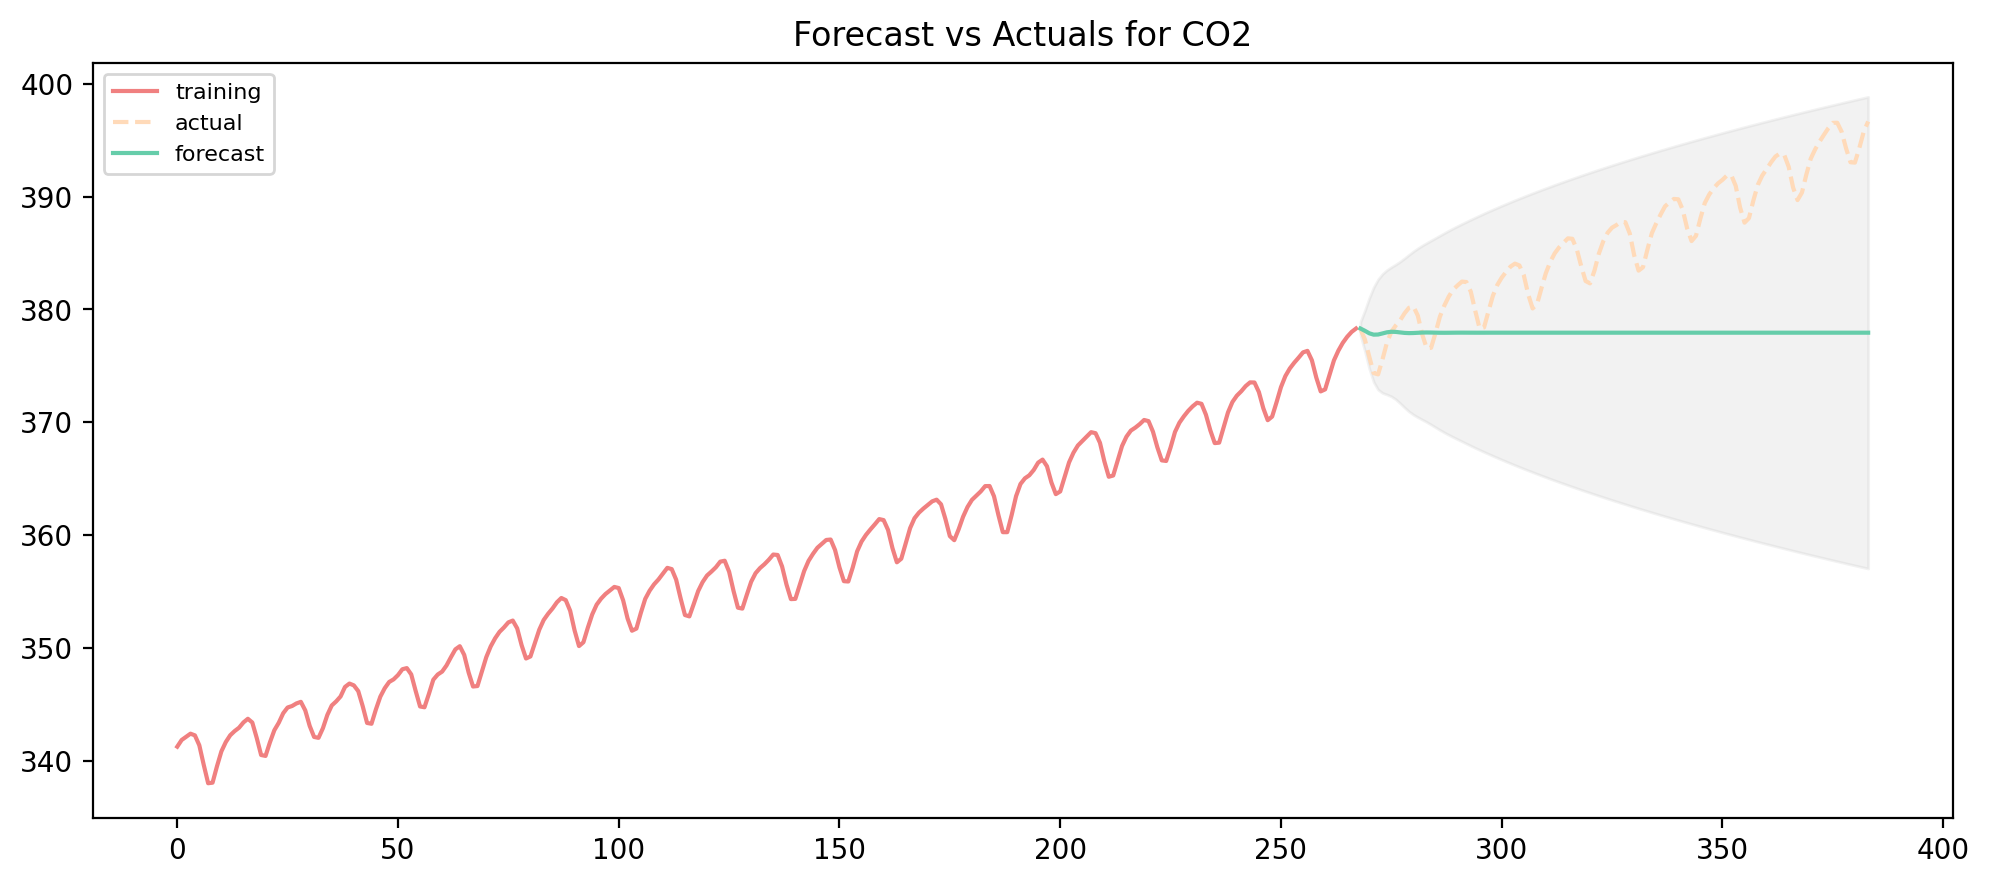

In [60]:
fc_series,lower_series,upper_series = arima(train_co2,test_co2,p=2)
plot(train_co2,test_co2,fc_series,lower_series,upper_series,t='CO2')

In [61]:
forecast_accuracy(fc_series, test_co2.values)

{'mae': 8.303525110186488,
 'rmse': 9.892173661119145,
 'corr': -0.01796743848170718}

**HUMIDITY**

In [62]:
train_humidity = climate_change['relative_humidity'][:int(np.floor((len(climate_change)/100)*70))] #70% train
test_humidity = climate_change['relative_humidity'][int(np.floor((len(climate_change)/100)*70)):] #30% train

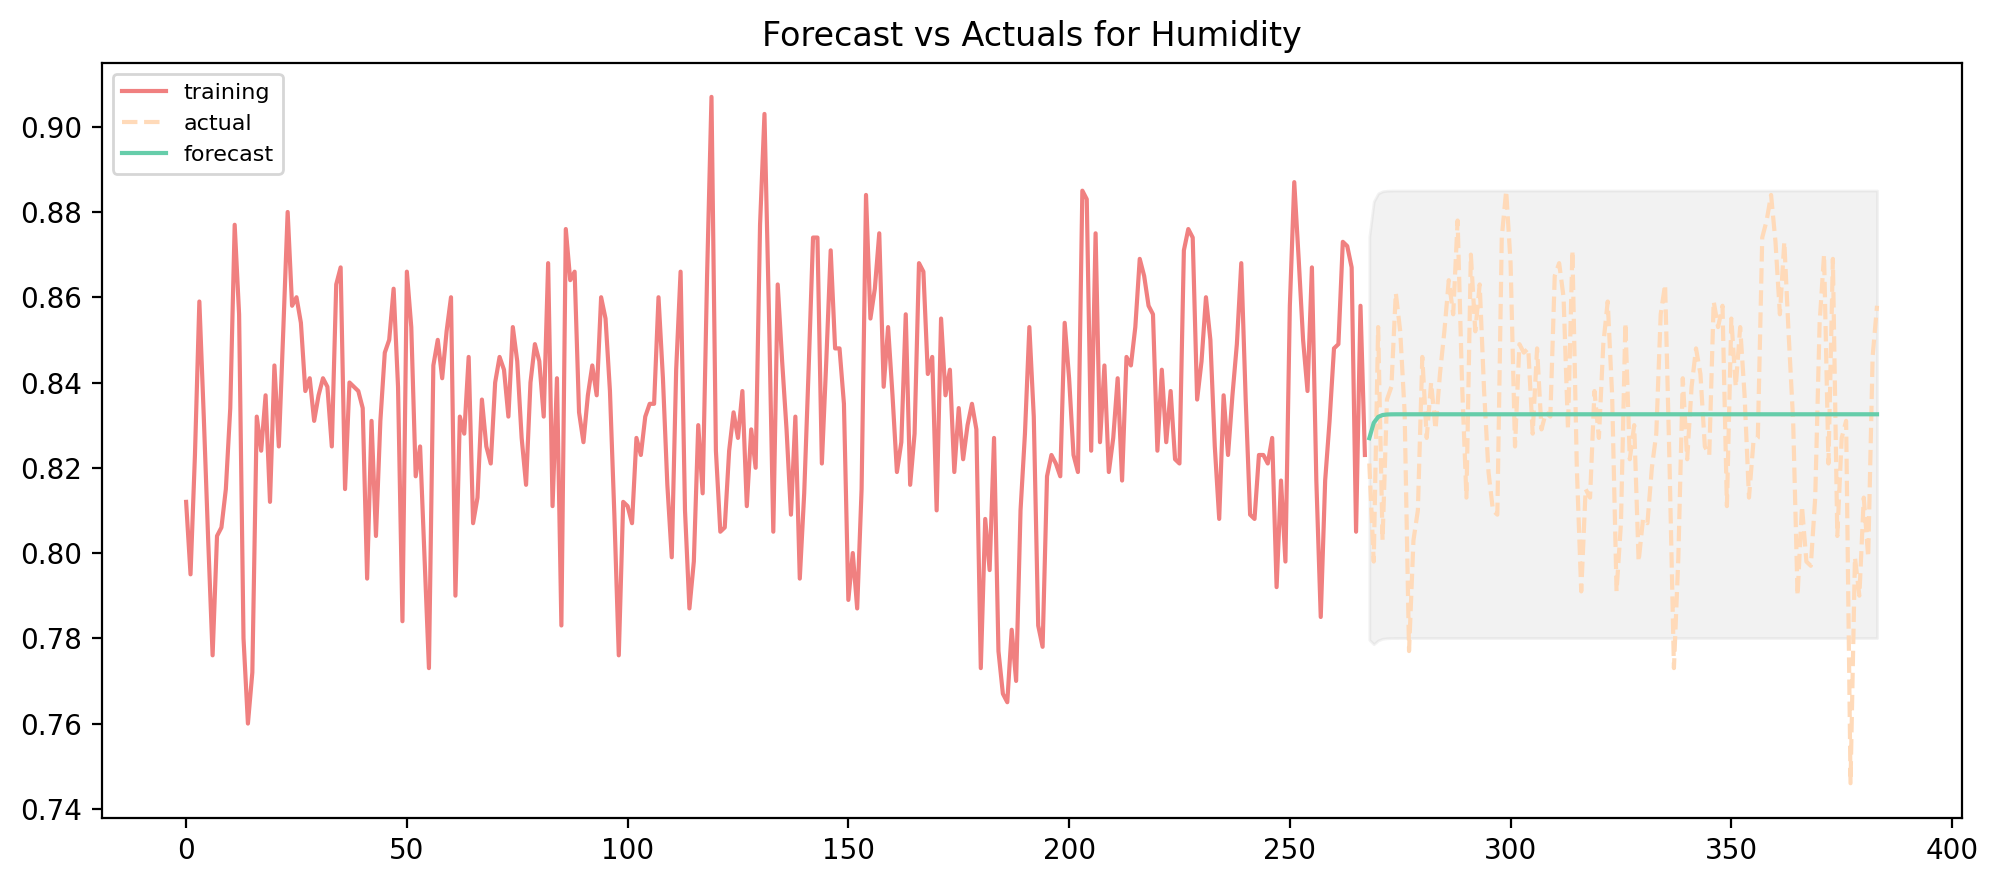

In [63]:
fc_series,lower_series,upper_series = arima(train_humidity,test_humidity,p=2)
plot(train_humidity,test_humidity,fc_series,lower_series,upper_series,t='Humidity')

In [64]:
forecast_accuracy(fc_series, test_humidity.values)

{'mae': 0.021643920758207973,
 'rmse': 0.02637944382839799,
 'corr': 0.08253847357938614}

**TOTAL RAINFALL**

In [65]:
train_rainfall = climate_change['total_rainfall'][:int(np.floor((len(climate_change)/100)*70))] #70% train
test_rainfall = climate_change['total_rainfall'][int(np.floor((len(climate_change)/100)*70)):] #30% train

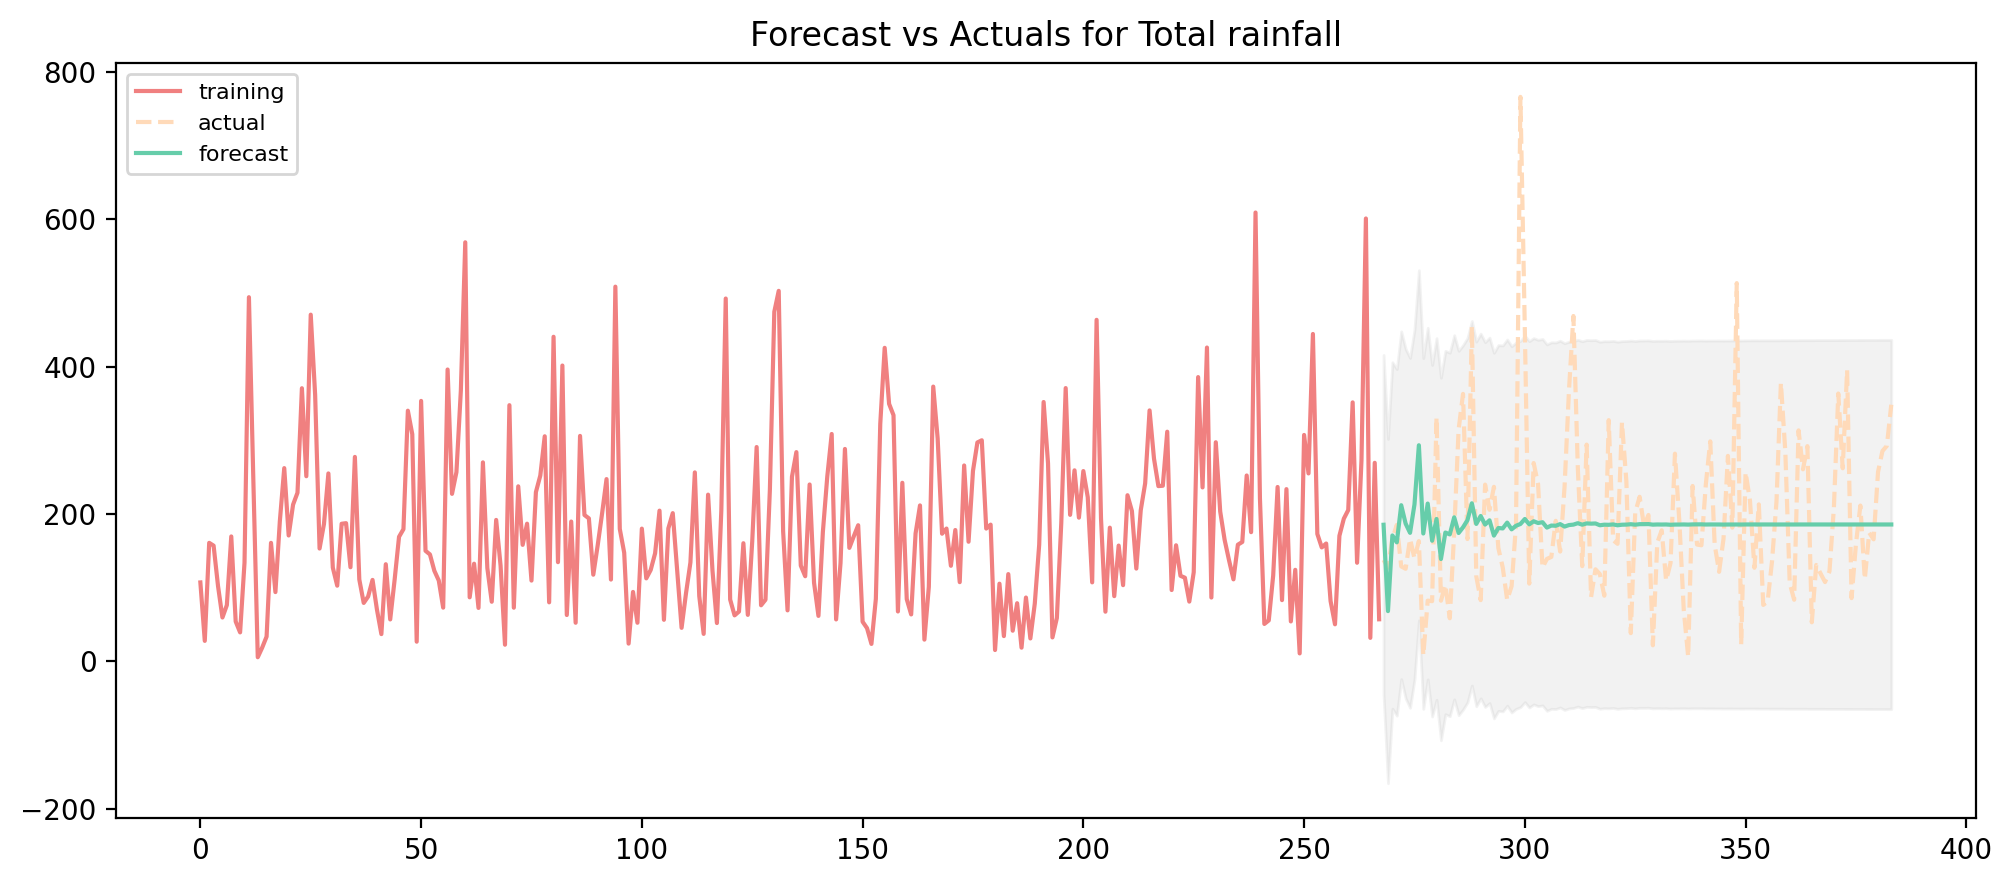

In [66]:
fc_series,lower_series,upper_series = arima(train_rainfall,test_rainfall,p=12)
plot(train_rainfall,test_rainfall,fc_series,lower_series,upper_series,t='Total rainfall')

In [67]:
forecast_accuracy(fc_series, test_rainfall.values)

{'mae': 85.35256642244556,
 'rmse': 114.6502046488186,
 'corr': 0.08675912168736653}

**NUMBER OF RAINY DAYS**

In [68]:
train_rain_days = climate_change['no_of_rainy_days'][:int(np.floor((len(climate_change)/100)*70))] #70% train
test_rain_days = climate_change['no_of_rainy_days'][int(np.floor((len(climate_change)/100)*70)):] #30% train

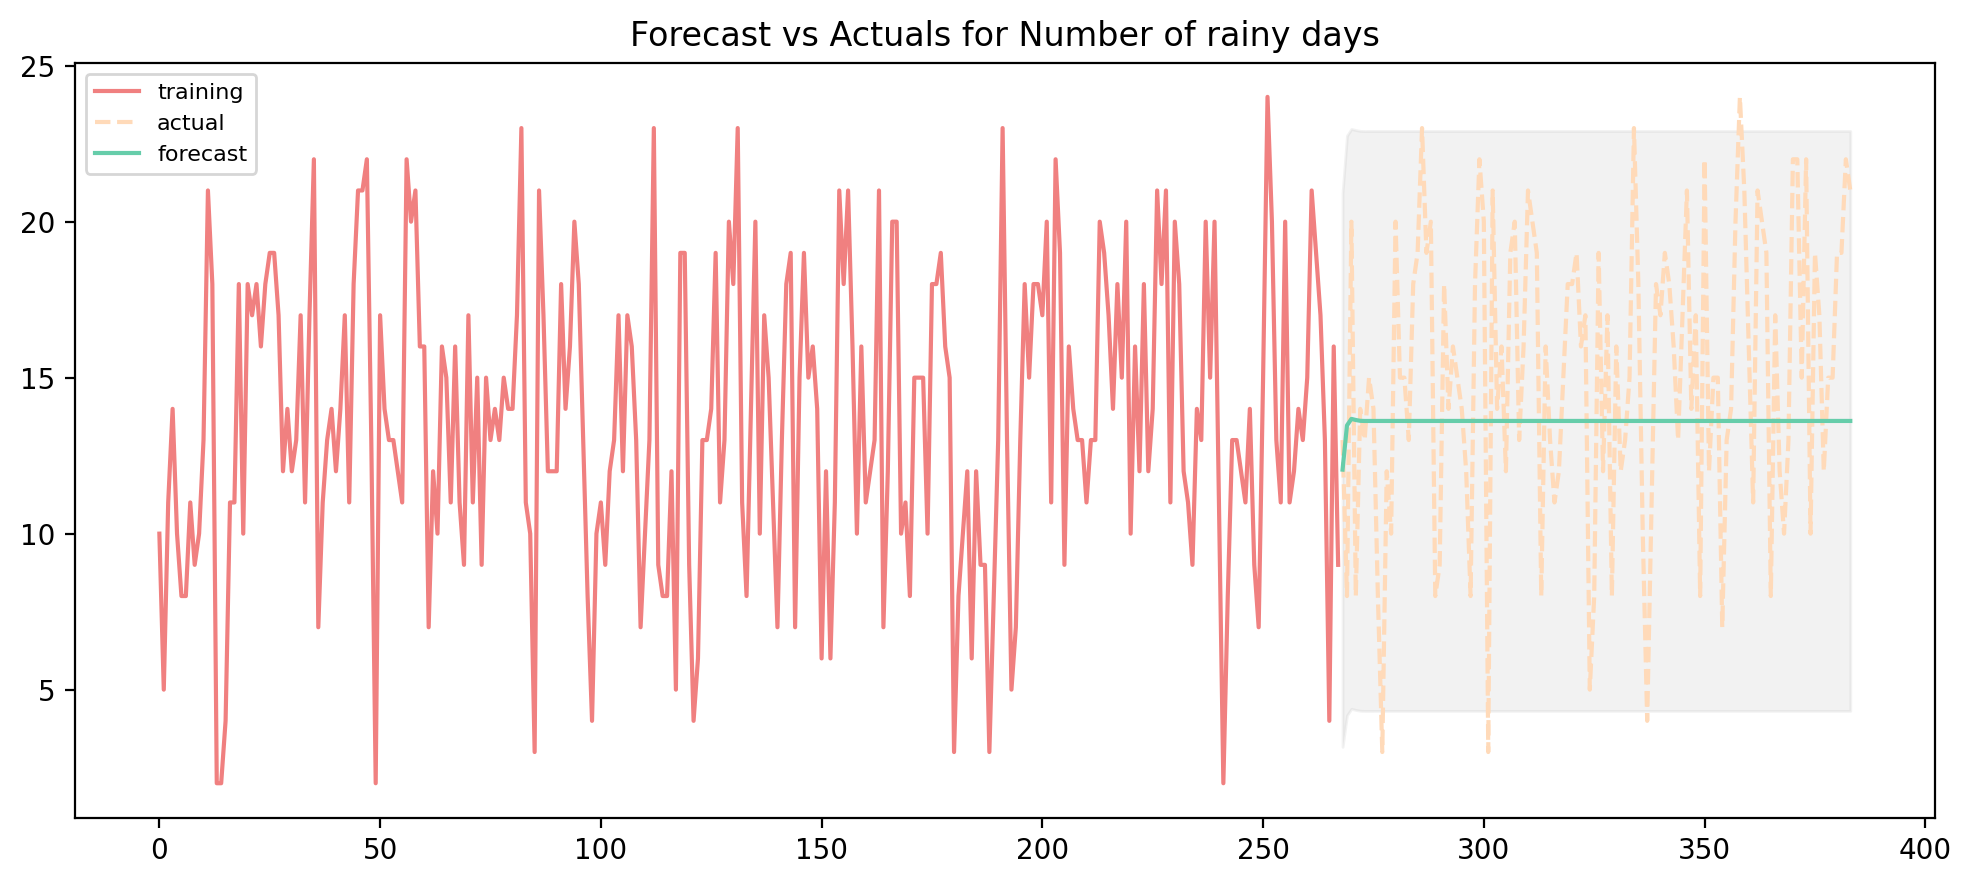

In [69]:
fc_series,lower_series,upper_series = arima(train_rain_days,test_rain_days,p=2)
plot(train_rain_days,test_rain_days,fc_series,lower_series,upper_series,t='Number of rainy days')

In [70]:
forecast_accuracy(fc_series, test_rain_days.values)

{'mae': 4.132123637303977,
 'rmse': 4.957791577880229,
 'corr': 0.057227188397992644}

**GMSL(Global Mean Sea Level)**

In [71]:
train_GMSL = climate_change['GMSL(Global Mean Sea Level)'][:int(np.floor((len(climate_change)/100)*70))] #70% train
test_GMSL = climate_change['GMSL(Global Mean Sea Level)'][int(np.floor((len(climate_change)/100)*70)):] #30% train

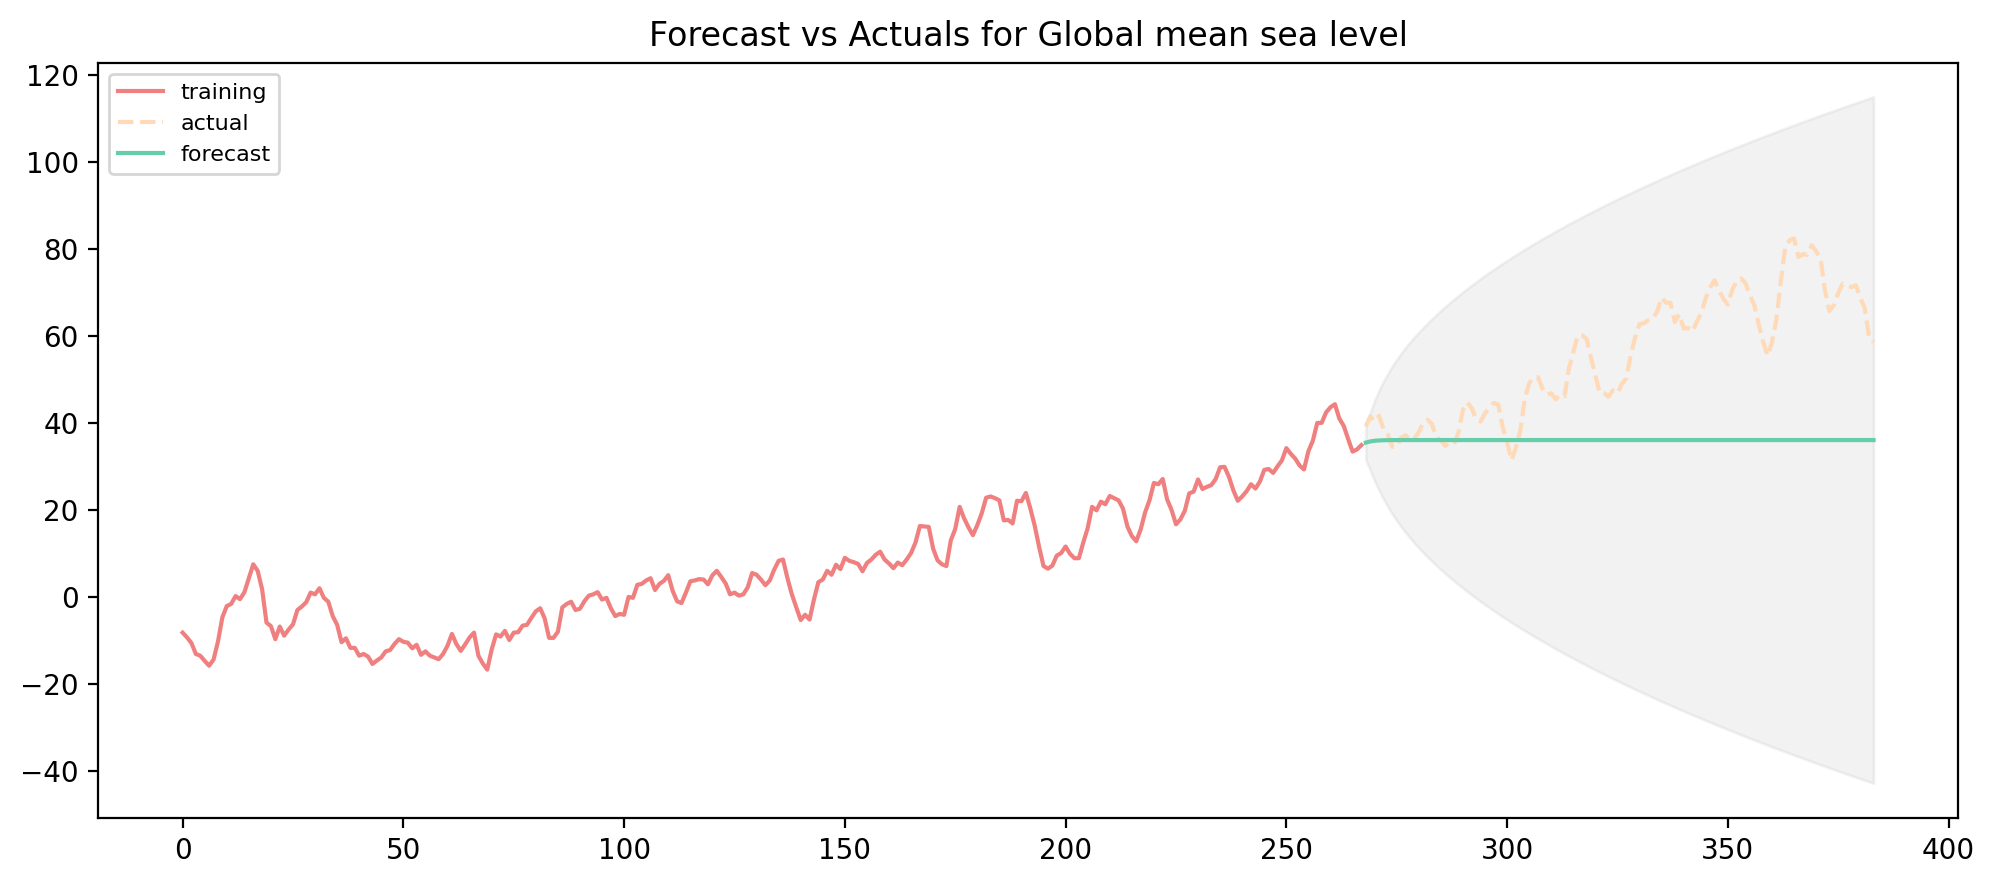

In [76]:
fc_series,lower_series,upper_series = arima(train_GMSL,test_GMSL,p=2)
plot(train_GMSL,test_GMSL,fc_series,lower_series,upper_series,t='Global mean sea level')

In [77]:
forecast_accuracy(fc_series, test_GMSL.values)

{'mae': 19.52639412598153,
 'rmse': 23.974580564940005,
 'corr': 0.18291178531794608}

**Anomalies Land&Ocean Temperature**

In [78]:
train_anomalies_temp = climate_change['Anomalies_Land_Ocean_Temperature'][:int(np.floor((len(climate_change)/100)*70))] #70% train
test_anomalies_temp = climate_change['Anomalies_Land_Ocean_Temperature'][int(np.floor((len(climate_change)/100)*70)):] #30% train

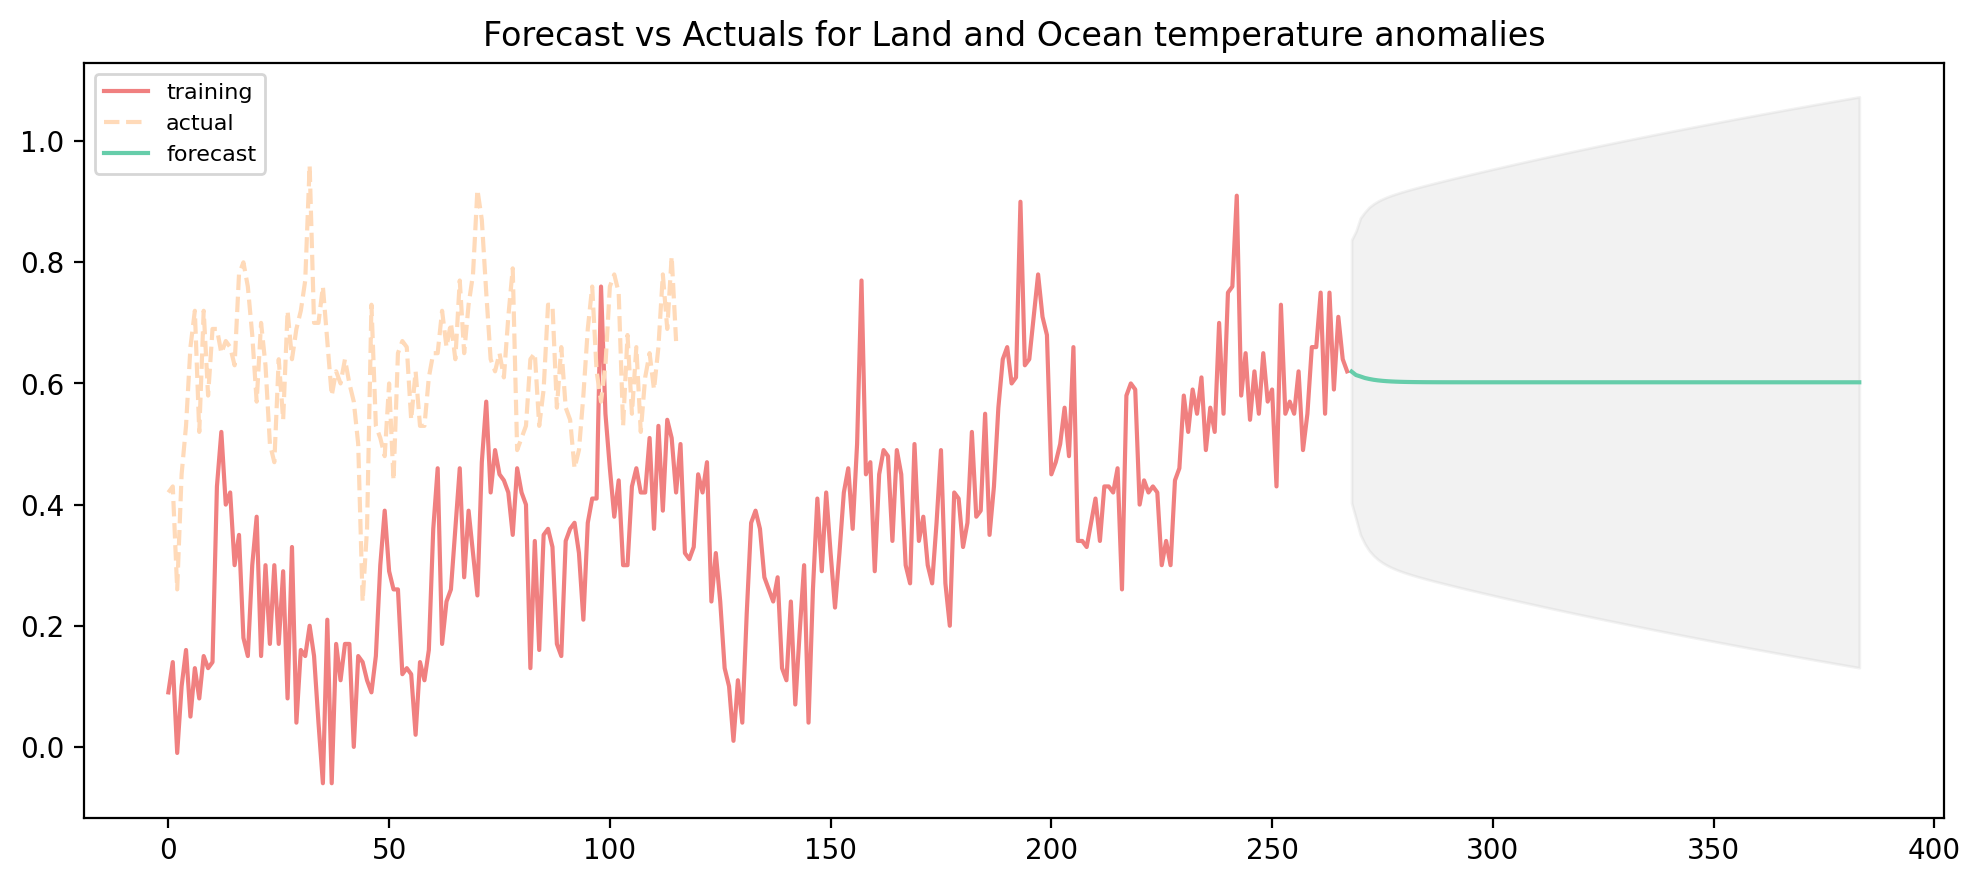

In [83]:
fc_series,lower_series,upper_series = arima(train_anomalies_temp,test_anomalies_temp,p=2)
plot(train_anomalies_temp,test_anomalies_temp.values,fc_series,lower_series,upper_series,t='Land and Ocean temperature anomalies')

In [84]:
forecast_accuracy(fc_series, test_anomalies_temp.values)

{'mae': 0.09509225308824047,
 'rmse': 0.12036160779581648,
 'corr': -0.35462304620209295}